In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Load data

In [25]:
X = np.load("Data/X.npy")
y = np.load("Data/y.npy")

In [26]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [27]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [28]:
print ('X shape is:', X.shape)
print ('y shape is:', y.shape)

X shape is: (5000, 400)
y shape is: (5000, 1)


## Visualization

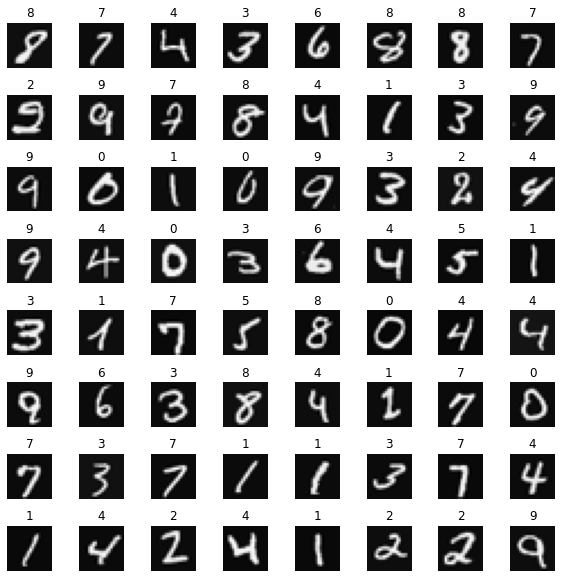

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Tensorflow Model Implementation

In [31]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation="relu", name="L1"),
        Dense(15, activation="relu", name="L2"),
        Dense(10, activation="linear", name="L3")        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0897
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0847
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0811
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0758
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 7/40
157/157 [==============================] - ETA: 0s - loss: 0.065 - 0s 1ms/step - loss: 0.0651
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0443
E

### An example

In [36]:
image_of_two = X[1015]

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

 predicting a Two: 
[[ -8.805101    3.6563227  10.797566   -1.5004687 -22.90567   -11.689986
   -7.728231    3.6794019 -10.502653  -13.240577 ]]
 Largest Prediction index: 2


In [57]:
predictions = np.zeros((10,10))
num = 1
samples = X[0:5000:500]
for i in range(10):
    predictions[i,:] = model.predict(samples[i].reshape(1,400))
 
    

(10, 10)

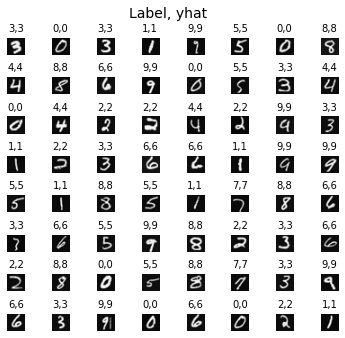

In [60]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()